In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

TRAIN DATASET

In [6]:
dataset = pd.read_csv('fraudTrain.csv')
dataset["trans_date_trans_time"]=pd.to_datetime(dataset['trans_date_trans_time'])
x= dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [7]:
x.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [8]:
x.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

In [9]:
x.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
dtype: object

In [10]:
x["category"]=x["category"].astype('category')
x["category"]=x["category"].cat.codes
x["category"]=x["category"].astype('int')
x["category"]

0          8
1          4
2          0
3          2
4          9
          ..
1296670    0
1296671    1
1296672    1
1296673    1
1296674    1
Name: category, Length: 1296675, dtype: int32

In [11]:
x["merchant"]=x["merchant"].astype('category')
x["merchant"]=x["merchant"].cat.codes
x["merchant"]=x["merchant"].astype('int')
x["merchant"]

0          514
1          241
2          390
3          360
4          297
          ... 
1296670    499
1296671      2
1296672    599
1296673    509
1296674    370
Name: merchant, Length: 1296675, dtype: int32

In [12]:
x["job"]=x["job"].astype('category')
x["job"]=x["job"].cat.codes
x["job"]=x["job"].astype('int')
x["job"]

0          370
1          428
2          307
3          328
4          116
          ... 
1296670    215
1296671    360
1296672    308
1296673    485
1296674    467
Name: job, Length: 1296675, dtype: int32

In [13]:
x.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                          int32
category                          int32
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                               int32
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
dtype: object

In [14]:
x_train=x[['trans_date_trans_time','cc_num','merchant','category','amt','zip','lat','long','city_pop','job','unix_time','merch_lat','merch_long']]
y_train=y
x_train

,trans_date_trans_time,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,2019-01-01 00:00:18,2703186189652095,514,8,4.97,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315
1,2019-01-01 00:00:44,630423337322,241,4,107.23,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462
2,2019-01-01 00:00:51,38859492057661,390,0,220.11,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481
3,2019-01-01 00:01:16,3534093764340240,360,2,45.00,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071
4,2019-01-01 00:03:06,375534208663984,297,9,41.96,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,499,0,15.56,84735,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765
1296671,2020-06-21 12:12:19,6011149206456997,2,1,51.70,21790,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528
1296672,2020-06-21 12:12:32,3514865930894695,599,1,105.93,88325,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529
1296673,2020-06-21 12:13:36,2720012583106919,509,1,74.90,57756,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.iloc[:,1:])
x_train


array([[-0.31669237,  0.85165441,  0.45285278, ..., -1.85866447,
        -0.49435433,  0.59386386],
       [-0.31875727, -0.50688018, -0.56926552, ..., -1.85866244,
         2.07869921, -2.03034087],
       [-0.31872806,  0.23459108, -1.59138383, ..., -1.8586619 ,
         0.90284908, -1.59232303],
       ...,
       [-0.3160722 ,  1.27464137, -1.33585425, ...,  1.75785644,
        -0.96243261, -1.08227231],
       [-0.31667951,  0.82677283, -1.33585425, ...,  1.75786142,
         0.83205082, -0.94507404],
       [ 2.96125682,  0.13506474, -1.33585425, ...,  1.7578615 ,
         1.57122907, -1.73985164]])

LOGISTIC REGRESSION


In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,max_iter=10000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

TEST DATASET

In [17]:
data=pd.read_csv('fraudTest.csv')
data["trans_date_trans_time"]=pd.to_datetime(data['trans_date_trans_time'])
x1= data.iloc[:, :-1]
y1 = data.iloc[:, -1]

In [18]:
x1["category"]=x1["category"].astype('category')
x1["category"]=x1["category"].cat.codes
x1["category"]=x1["category"].astype('int')
x1["category"]

0         10
1         10
2          5
3          9
4         13
          ..
555714     5
555715     7
555716     7
555717    13
555718     0
Name: category, Length: 555719, dtype: int32

In [19]:
x1["job"]=x1["job"].astype('category')
x1["job"]=x1["job"].cat.codes
x1["job"]=x1["job"].astype('int')
x1["job"]

0         275
1         392
2         259
3         407
4         196
         ... 
555714    460
555715    198
555716    294
555717     58
555718    276
Name: job, Length: 555719, dtype: int32

In [20]:
x1["merchant"]=x1["merchant"].astype('category')
x1["merchant"]=x1["merchant"].cat.codes
x1["merchant"]=x1["merchant"].astype('int')
x1["merchant"]

0         319
1         591
2         611
3         222
4         292
         ... 
555714    507
555715    264
555716    496
555717     75
555718    125
Name: merchant, Length: 555719, dtype: int32

In [21]:
x1.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                          int32
category                          int32
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                               int32
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
dtype: object

In [22]:
x_test=x1[['trans_date_trans_time','cc_num','merchant','category','amt','zip','lat','long','city_pop','job','unix_time','merch_lat','merch_long']]
y_test=y1
x_test

,trans_date_trans_time,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714
1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431
2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111
3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061
4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,507,5,43.77,63453,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331
555715,2020-12-31 23:59:09,3556613125071656,264,7,111.84,77566,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633
555716,2020-12-31 23:59:15,6011724471098086,496,7,86.88,99323,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054
555717,2020-12-31 23:59:24,4079773899158,75,13,7.99,83643,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888


In [23]:
x_test = sc.fit_transform(x_test.iloc[:,1:])
x_test

array([[-0.31725171, -0.11966343,  0.9616832 , ..., -1.70387057,
        -0.89414512,  0.65758597],
       [-0.31627306,  1.23165562,  0.9616832 , ..., -1.70386903,
         0.17812627, -1.43661011],
       [-0.31625383,  1.33101731, -0.31615123, ..., -1.70386518,
         0.38325734,  1.16764009],
       ...,
       [-0.31441123,  0.75968757,  0.19498254, ...,  1.5103518 ,
         1.59258662, -2.14691241],
       [-0.31899779, -1.3318761 ,  1.72838387, ...,  1.51035353,
         1.1632518 , -1.95510037],
       [-0.31581678, -1.08347186, -1.59398566, ...,  1.51035546,
        -0.45776708, -0.49551901]])

METRICS

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
res=accuracy_score(y_test, y_pred)
print("logestic regression",res)

[[553206    368]
 [  2145      0]]
logestic regression 0.9954779303928785


RANDOM FOREST CLASSIFIER

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

METRICS

In [27]:
y_pred = classifier1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
res=accuracy_score(y_test, y_pred)
print("random forest",res)

[[553269    305]
 [  1205    940]]
random forest 0.9972827994004164


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/294.9 kB 43

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\pyserial-3.5-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


<Axes: >

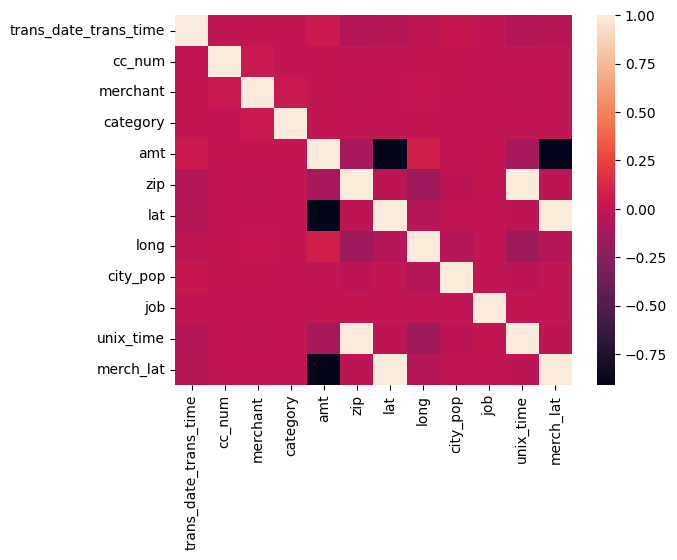

In [36]:
import seaborn as sb
X=pd.DataFrame(x_train)
X.columns=['trans_date_trans_time','cc_num','merchant','category','amt','zip','lat','long','city_pop','job','unix_time','merch_lat']
sb.heatmap(X.corr())
